<a href="https://colab.research.google.com/github/Idzhar16/dataset/blob/main/finalcodemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Dataset_Capstone/finaldataset.zip" -d "/content"

Archive:  /content/drive/MyDrive/Dataset_Capstone/finaldataset.zip
   creating: /content/fixbanget/
  inflating: /content/fixbanget/adem sari (1).jpeg  
  inflating: /content/fixbanget/adem sari (10).jpg  
  inflating: /content/fixbanget/adem sari (11).jpg  
  inflating: /content/fixbanget/adem sari (12).jpg  
  inflating: /content/fixbanget/adem sari (13).jpg  
  inflating: /content/fixbanget/adem sari (14).jpg  
  inflating: /content/fixbanget/adem sari (15).jpg  
  inflating: /content/fixbanget/adem sari (16).jpg  
  inflating: /content/fixbanget/adem sari (17).jpg  
  inflating: /content/fixbanget/adem sari (18).jpg  
  inflating: /content/fixbanget/adem sari (19).jpg  
  inflating: /content/fixbanget/adem sari (2).jpg  
  inflating: /content/fixbanget/adem sari (20).jpg  
  inflating: /content/fixbanget/adem sari (21).jpg  
  inflating: /content/fixbanget/adem sari (22).jpg  
  inflating: /content/fixbanget/adem sari (23).jpg  
  inflating: /content/fixbanget/adem sari (24).jpg  


# Split Train and Validation

In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [ ]:
# Specify the paths to original dataset and the destination directory
original_dataset_path = 'fixbanget/'
destination_path = '/content/dataset'

# Get a list of all subdirectories in the original dataset path
class_directories = os.listdir(original_dataset_path)
train_split_ratio = 0.8
print(class_directories)

['fruit tea (24).jpeg', 'ichitan green tea (4).jpg', 'teh kotak (18).jpeg', 'le minerale (15).HEIC', 's tee (25).jpeg', 'coca cola (24).jpeg', 's tee (14).jpeg', 'milo (9).jpg', 'fanta (22).jpg', 'teh kotak (11).jpeg', 'frestea (3).jpeg', 'teh pucuk (17).HEIC', 'teh pucuk (18).HEIC', 'milo (18).jpg', 'adem sari (5).jpg', 'coca cola (23).jpeg', 'milo (6).jpg', 'bear brand (1).jpg', 'sprite (13).jpg', 'cimory (20).jpeg', 'milo (20).jpg', 'coca cola (22).jpeg', 'teh botol (3).jpeg', 'pulpy (11).jpg', 'teh pucuk (12).HEIC', 'le minerale (2).HEIC', 'teh botol (2).jpeg', 'aqua (4).jpeg', 'cimory (9).jpeg', 'golda (21).jpeg', 'pulpy (18).jpg', 'pocari (14).HEIC', 'fruit tea (23).jpeg', 'teh gelas (25).jpeg', 'gunung (25).jpeg', 's tee (19).jpeg', 'le minerale (18).HEIC', 'sprite (23).jpg', 'fruit tea (5).jpeg', 'adem sari (29).jpg', 'adem sari (21).jpg', 's tee (9).jpeg', 'milo (3).jpg', 'ultra milk moka (11).jpeg', 'ultra milk moka (9).jpeg', 'teh botol (9).jpeg', 'gunung (10).jpeg', 'teh ge

In [ ]:
class_dict = {}
for i, class_directory in enumerate(class_directories):
    class_path = os.path.join(original_dataset_path, class_directory)

    # Check if the item in the directory is a directory itself
    if os.path.isdir(class_path):
        class_dict[i] = class_directory
        # Create a destination directory for the class in the new structure
        # Create a destination directory for the class in the new structure
        destination_train_class_path = os.path.join(destination_path, 'train', class_directory)
        os.makedirs(destination_train_class_path, exist_ok=True)

        destination_validation_class_path = os.path.join(destination_path, 'validation', class_directory)
        os.makedirs(destination_validation_class_path, exist_ok=True)

        # Get a list of all image files in the class directory
        image_files = os.listdir(class_path)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the split index based on the split ratio
        split_index = int(train_split_ratio * len(image_files))

        # Split the image files into train and validation sets
        train_files = image_files[:split_index]
        validation_files = image_files[split_index:]

        # Move each train image file to the corresponding class directory in the train split
        for train_file in train_files:
            image_path = os.path.join(class_path, train_file)
            destination_image_path = os.path.join(destination_train_class_path, train_file)
            shutil.copy2(image_path, destination_image_path)

        # Move each validation image file to the corresponding class directory in the validation split
        for validation_file in validation_files:
            image_path = os.path.join(class_path, validation_file)
            destination_image_path = os.path.join(destination_validation_class_path, validation_file)
            shutil.copy2(image_path, destination_image_path)

print('Dataset reorganized and split successfully!')

Dataset reorganized and split successfully!


# Preprocess

In [ ]:
PATH = os.path.join("/content/drive/MyDrive/Dataset_Capstone/dataset")
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 407 files belonging to 23 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 95 files belonging to 23 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Adem Sari', 'aqua', 'bear brand', 'cimory', 'coca cola', 'fanta', 'frestea', 'fruit tea', 'golda', 'good day', 'gunung', 'ichitan green tea', 'le minerale', 'milo', 'pocari', 'pulpy', 's tee', 'sprite', 'teh botol', 'teh gelas', 'teh kotak', 'teh pucuk', 'ultra milk moka']


In [ ]:
# Save Classname in txt file
with open('class_names.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

print(class_names)

['Adem Sari', 'aqua', 'bear brand', 'cimory', 'coca cola', 'fanta', 'frestea', 'fruit tea', 'golda', 'good day', 'gunung', 'ichitan green tea', 'le minerale', 'milo', 'pocari', 'pulpy', 's tee', 'sprite', 'teh botol', 'teh gelas', 'teh kotak', 'teh pucuk', 'ultra milk moka']


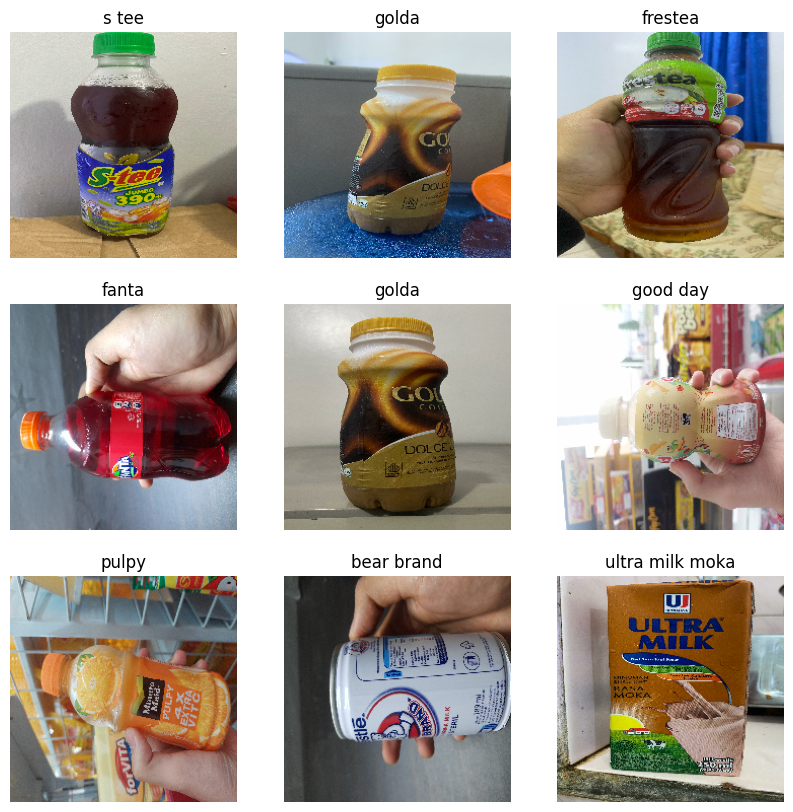

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 3
Number of test batches: 0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2),
])

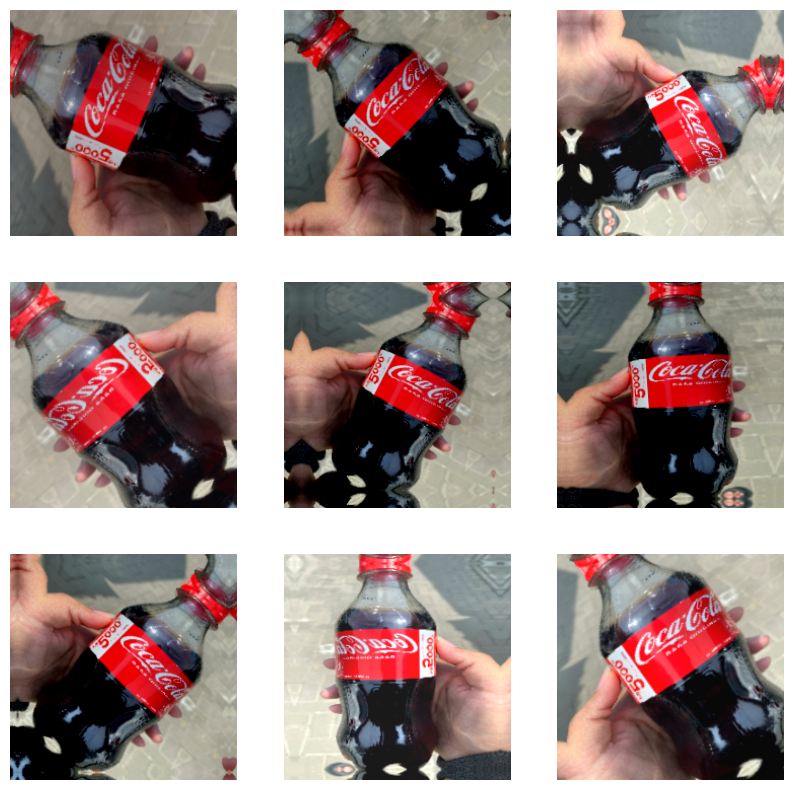

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./255, offset=-1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Create and Training Model

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetV2M(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

214201816/214201816 [==============================] - 2s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(len(class_names))
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 23)


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 23)                29463 

In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 100
loss0, accuracy0 = model.evaluate(validation_dataset)

3/3 [==============================] - 72s 10s/step - loss: 3.2667 - accuracy: 0.0737


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.27
initial accuracy: 0.07


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor="val_loss",
                            factor=0.25,
                            patience=1,
                            verbose=1,
                            min_lr=1e-7
                        )

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,
                      epochs=initial_epochs,
                      validation_data=validation_dataset)

Epoch 1/100
13/13 [==============================] - 241s 14s/step - loss: 2.8819 - accuracy: 0.1720 - val_loss: 2.5227 - val_accuracy: 0.3579
Epoch 2/100
13/13 [==============================] - 208s 13s/step - loss: 2.1037 - accuracy: 0.6020 - val_loss: 2.0076 - val_accuracy: 0.6947
Epoch 3/100
13/13 [==============================] - 213s 14s/step - loss: 1.5522 - accuracy: 0.8157 - val_loss: 1.6971 - val_accuracy: 0.7684
Epoch 4/100
13/13 [==============================] - 218s 14s/step - loss: 1.2242 - accuracy: 0.8673 - val_loss: 1.4897 - val_accuracy: 0.8421
Epoch 5/100
13/13 [==============================] - 217s 14s/step - loss: 0.9586 - accuracy: 0.9238 - val_loss: 1.3617 - val_accuracy: 0.8421
Epoch 6/100
13/13 [==============================] - 216s 14s/step - loss: 0.8233 - accuracy: 0.9214 - val_loss: 1.2630 - val_accuracy: 0.8632
Epoch 7/100
13/13 [==============================] - 212s 14s/step - loss: 0.6821 - accuracy: 0.9509 - val_loss: 1.1969 - val_accuracy: 0.8737

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("saved_model/saved_model_format", include_optimizer=False)

In [ ]:
(tf. __version__)

In [ ]:
!python --__version__

In [ ]:
model.save("saved_model/model_saved")

In [ ]:
tf.saved_model.save(model,"saved_model/h5_format_new" )

In [ ]:
!zip -r "/content/saved_model.zip" "/content/saved_model/h5_format_new"

# Fine tune 1

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 300

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
fine_tune_epochs = 0
total_epochs =  initial_epochs + fine_tune_epochs
with tf.device('/GPU:0'):
  history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping,callback_reduce_lr])

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']

val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

In [ ]:
!mkdir -p saved_model
history_fine.model.save('saved_model/my_model')

In [ ]:
history_fine.model.save('saved_model/my_model_h5/my_model.h5')

# fine tune 2

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [ ]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_1 = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping])